___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [196]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
#check for duplicate values
df.duplicated().sum()

0

In [8]:
#check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

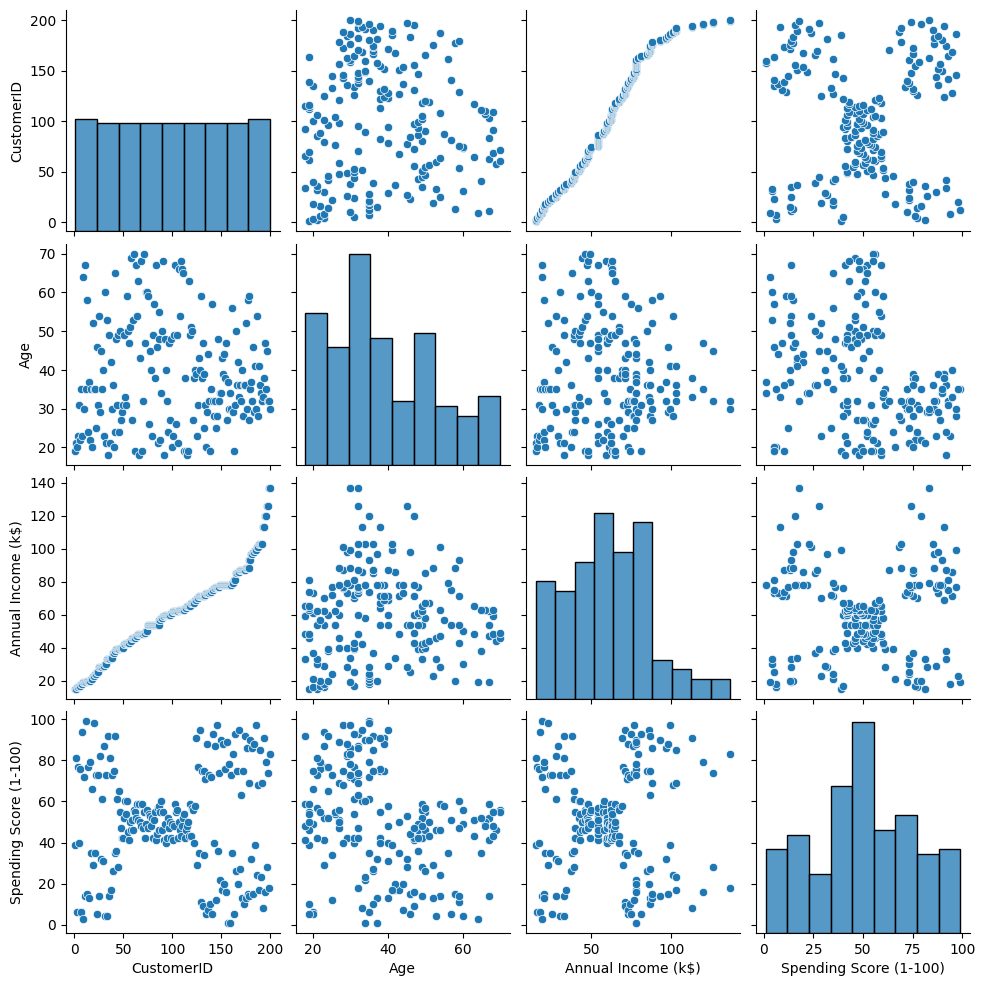

In [9]:
#get an overview of the number of cluster present in the data
sns.pairplot(df)
plt.show()

In [184]:
df['CustomerID'].nunique()

200

In [197]:
# drop the id column It does not affect the model
df.drop(["CustomerID"], axis = 1, inplace=True)

In [12]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

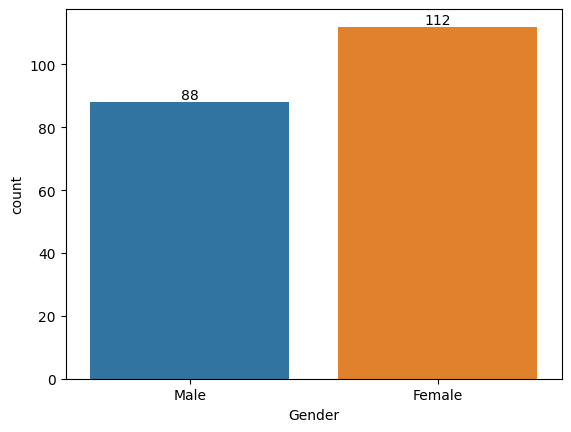

In [13]:
#check the distribution of male and female
ax = sns.countplot(df , x='Gender')
ax.bar_label(ax.containers[0]);

Text(0, 0.5, 'Count')

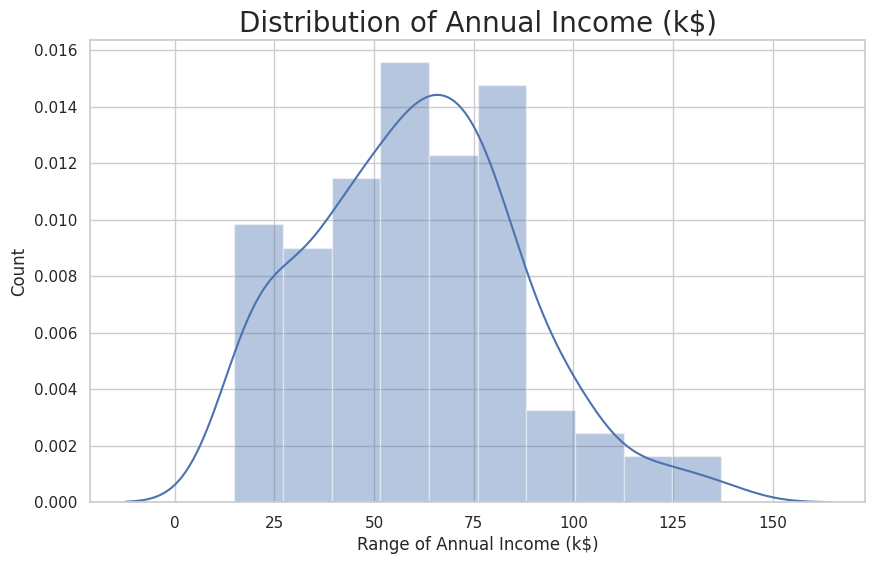

In [14]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')
#Most of value income falls between 50K to 85K

Text(0, 0.5, 'Count')

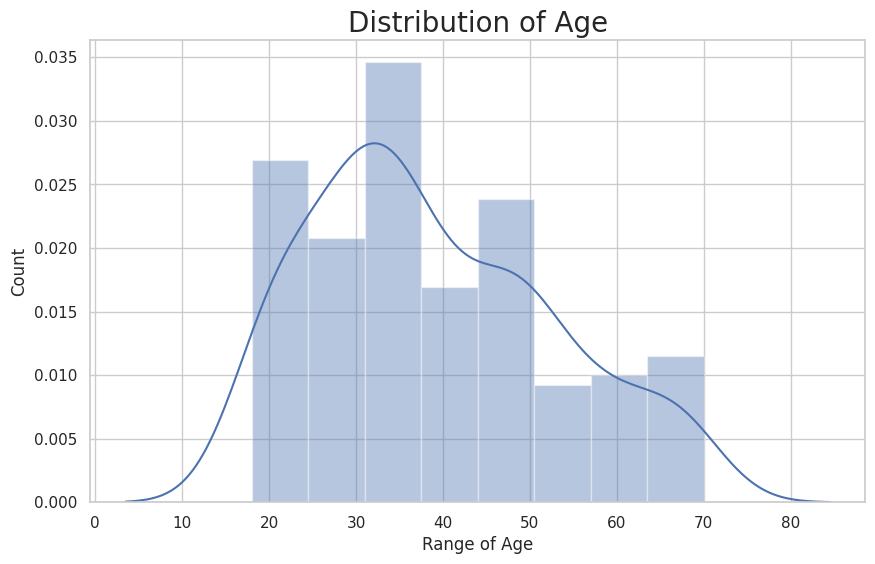

In [15]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
#customers of a wide of ages.

Text(0, 0.5, 'Count')

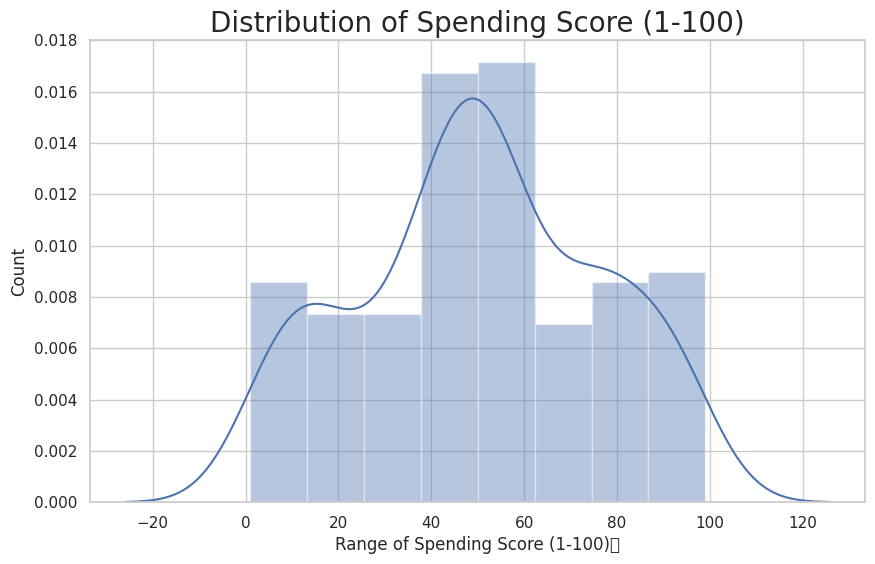

In [16]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)	')
plt.ylabel('Count')
#spending score is in the range of 40 to 60

<Axes: >

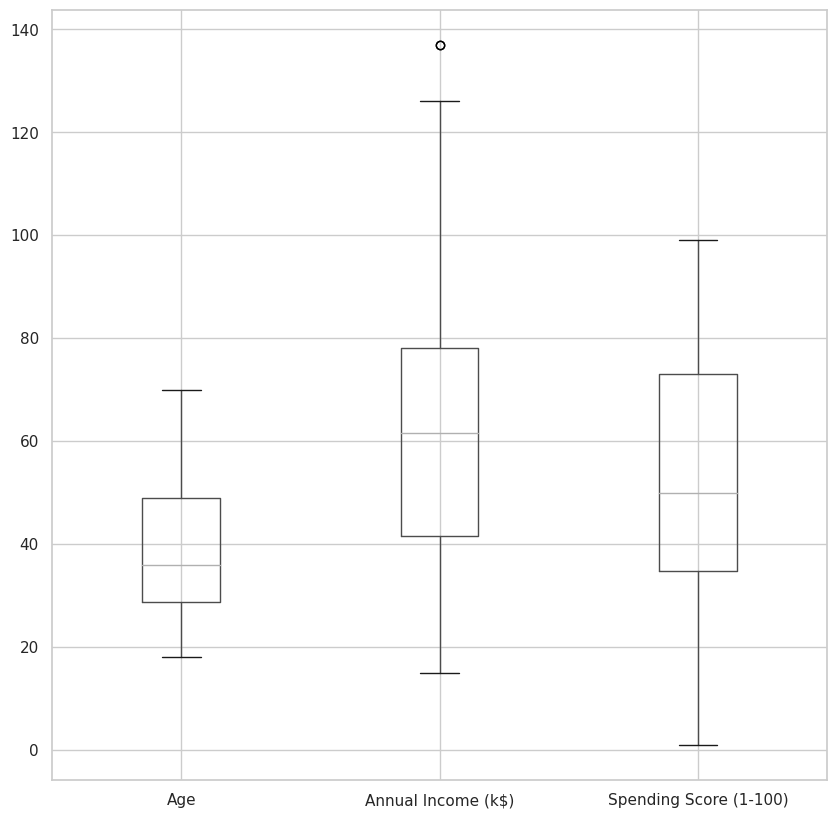

In [17]:
plt.figure(figsize =(10,10))
df.boxplot()


In [18]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

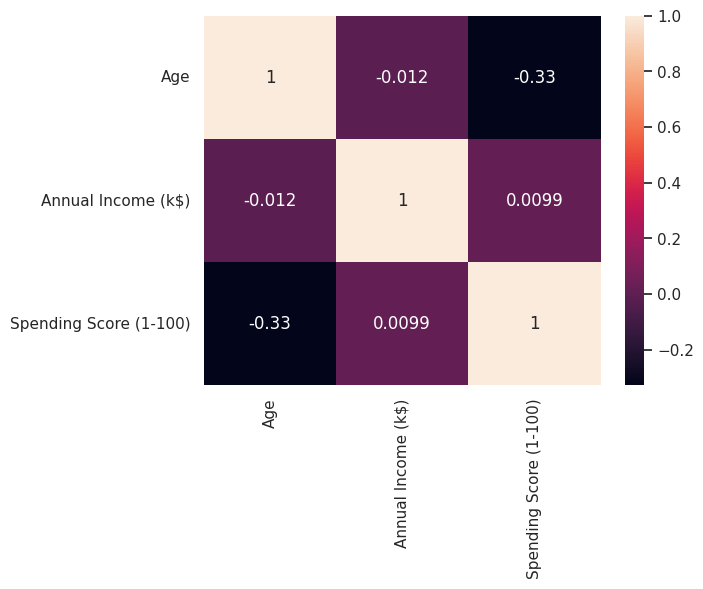

In [19]:
#Correlation plot
sns.heatmap(df.corr(),annot = True)

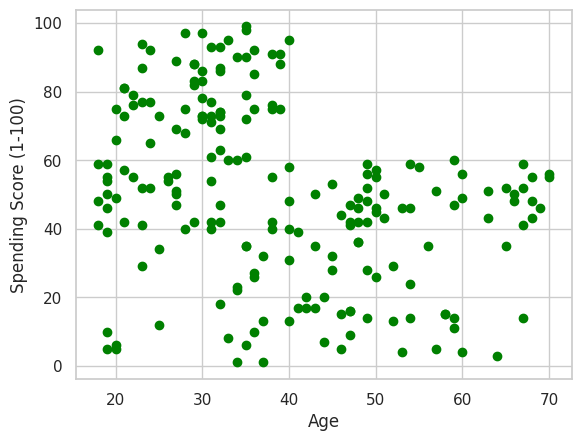

In [20]:
#Age and Spending Score correlation
plt.xlabel ("Age")
plt.ylabel ("Spending Score (1-100)")
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='green')
plt.grid(True)

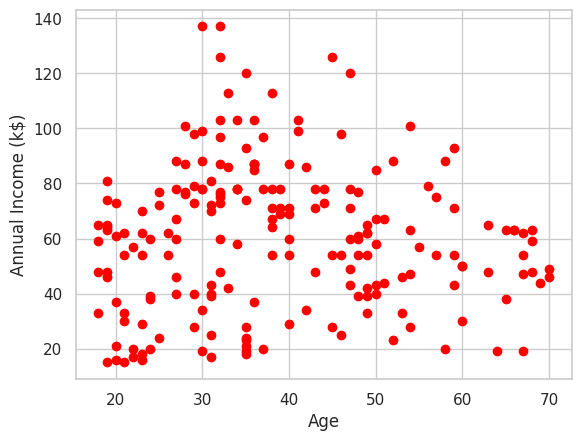

In [21]:
#Age and Annual Income correlation
plt.xlabel ("Age")
plt.ylabel ("Annual Income (k$)")
plt.scatter(df['Age'],df['Annual Income (k$)'],color='red')
plt.grid(True)

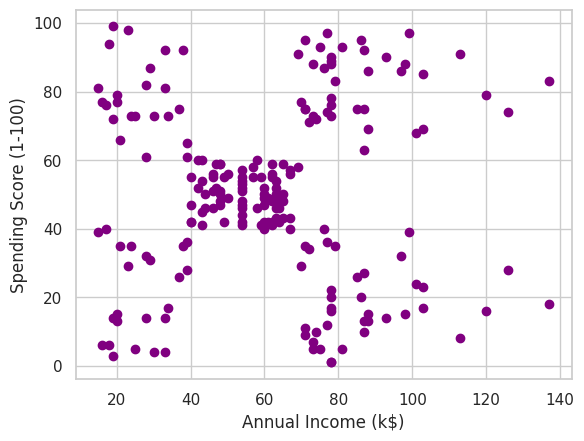

In [22]:
#Annual Income and Spending Score correlation
plt.xlabel ("Annual Income (k$)")
plt.ylabel ("Spending Score (1-100)")
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='purple')
plt.grid(True)

In [198]:
# Define the mapping dictionary
mapping = {'Male': 0, 'Female': 1}
# Map the categorical column to 0s and 1s
df['Gender'] = df['Gender'].map(mapping)
df['Gender']

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

# Hopkins test

In [24]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [25]:
hopkins(df, 1)

0.673345658415357

### Clustering based on Age and Spending Score-X

#### *i. Create a new dataset with two variables of your choice*

In [26]:
# Using DataFrame.copy() create new DaraFrame.
X=df[['Age','Spending Score (1-100)']].copy()
X

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [27]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5,
                       random_state=42)
K_means_model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [28]:
K_means_model.predict(X)

array([3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 2, 1, 2,
       4, 2, 4, 2, 1, 3, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       1, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 0, 3, 0, 1, 3, 1, 0, 3,
       3, 0, 0, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 1, 3, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2,
       4, 2], dtype=int32)

In [29]:
K_means_model.fit_predict(X)#returns a cluster number for each of the data points

array([3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 2, 1, 2,
       4, 2, 4, 2, 1, 3, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       1, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 0, 3, 0, 1, 3, 1, 0, 3,
       3, 0, 0, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 1, 3, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2,
       4, 2], dtype=int32)

In [30]:
hopkins(X, 1)

0.701932231483973

#### *ii. Determine optimal number of clusters*

In [31]:
#elbow graph is used in determining the number of clusters in a data set.

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

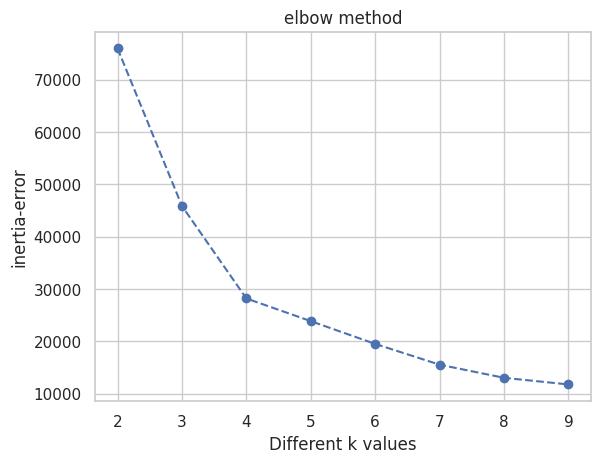

In [32]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [33]:
ssd # sum of squared distance

[75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23838.248821646186,
 19483.1179104427,
 15514.19313435103,
 13006.483628851018,
 11738.02029695451]

In [34]:
-pd.Series(ssd).diff()

0             NaN
1    30108.479394
2    17675.093049
3     4327.334745
4     4355.130911
5     3968.924776
6     2507.709506
7     1268.463332
dtype: float64

In [35]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X)
    distances = kmeanModel.transform(X)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i]
        result.append(np.mean(cluster_distances ** 2))
    distortion.append(sum(result))

Text(0.5, 1.0, 'elbow method')

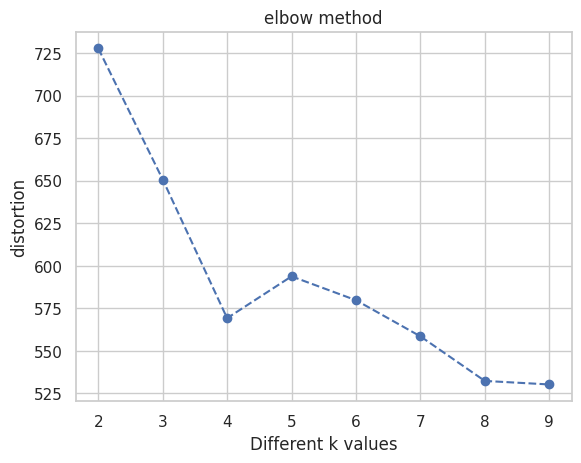

In [36]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [37]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


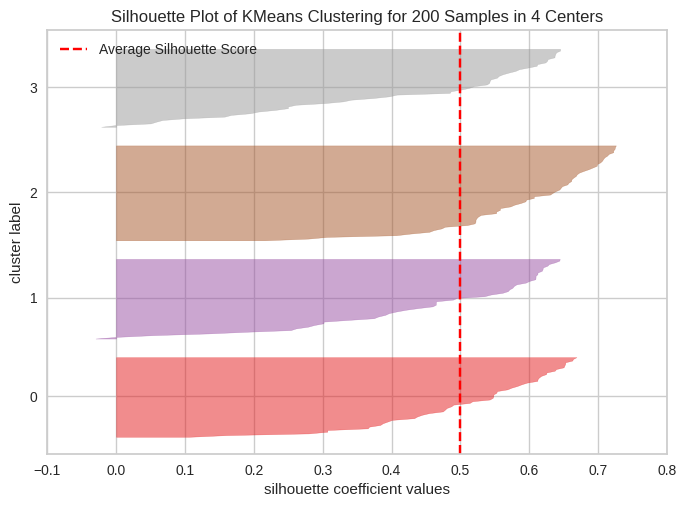

In [38]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=4,
                random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

In [39]:
model.n_clusters

4

In [40]:
for i in range(4):
    label = (model.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.45429047261675404
mean silhouette score for label 2    : 0.5960779476836082
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


#### *iii. Apply K Means*

In [41]:
K_means_model = KMeans(n_clusters=4,
                       random_state=42)
K_means_model.fit_predict(X)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

In [42]:
clusters_X = K_means_model.labels_

In [43]:
X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [44]:
X["predicted_clusters"] = clusters_X
X.head()

,Age,Spending Score (1-100),predicted_clusters
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3


In [45]:
centers_X = K_means_model.cluster_centers_
centers_X

array([[55.70833333, 48.22916667],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617]])

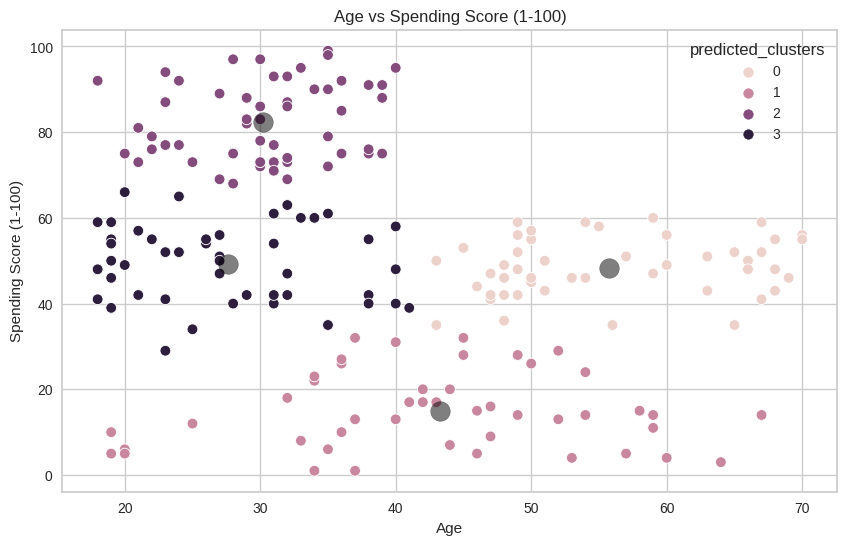

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age',y = 'Spending Score (1-100)',hue=X["predicted_clusters"],
                 #palette=['red','blue','green','purple','orange','gray'], legend='full',
                data = X  ,s = 60 )


# Plot the cluster centers (in black, as you've done)
plt.scatter(centers_X[:, 0],
            centers_X[:, 1],
            c='black',
            s=200,
            alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score (1-100)')
plt.show()



### Clustering based on Annual Income and Spending Score-X1

#### *i. Create a new dataset with two variables of your choice*

In [47]:
# Using DataFrame.copy() create new DaraFrame.
X1=df[['Annual Income (k$)','Spending Score (1-100)']].copy()
X1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [48]:
K_means_model = KMeans(n_clusters=5,
                       random_state=42)
K_means_model.fit_predict(X1)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [49]:
hopkins(X1, 1)

0.7113240595330106

#### *ii. Determine optimal number of clusters*

In [50]:
ssd = []

K2 = range(2,10)

for k in K2:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X1)
    ssd.append(model.inertia_)


Text(0.5, 1.0, 'elbow method')

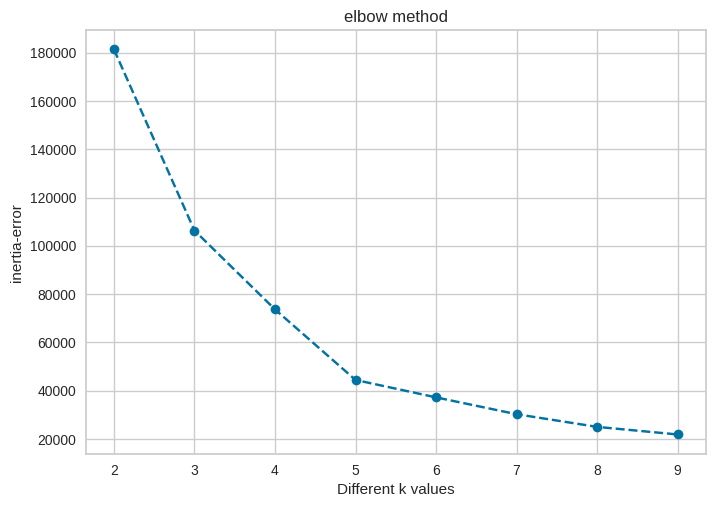

In [51]:
plt.plot(K2, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [52]:
-pd.Series(ssd).diff()

0             NaN
1    75015.222897
2    32668.584023
3    29231.333592
4     7214.640937
5     6974.157303
6     5247.817858
7     3149.746677
dtype: float64

In [53]:
K2 = range(2, 10)
distortion = []
for k in K2:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X1)
    distances = kmeanModel.transform(X1)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i]
        result.append(np.mean(cluster_distances ** 2))
    distortion.append(sum(result))

Text(0.5, 1.0, 'elbow method')

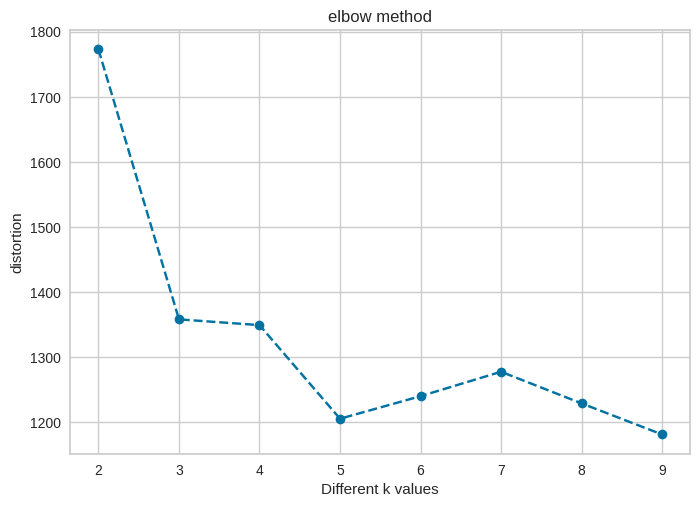

In [54]:
plt.plot(K2, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

In [55]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")



For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


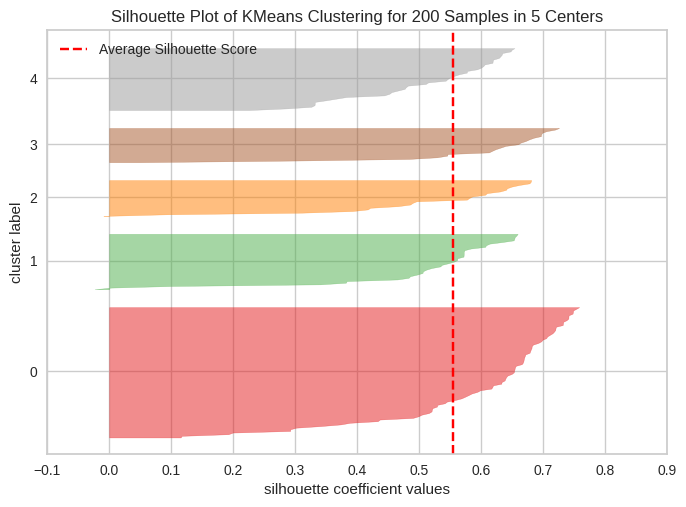

In [56]:
from yellowbrick.cluster import SilhouetteVisualizer

model_5 = KMeans(n_clusters=5,
                random_state=42)
visualizer = SilhouetteVisualizer(model_5)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();

In [57]:
for i in range(5):
    label = (model_5.labels_== i)
    print(f"mean silhouette score for label {i:<6} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0      : 0.5966512190217801
mean silhouette score for label 1      : 0.5039873487056818
mean silhouette score for label 2      : 0.5122676140736505
mean silhouette score for label 3      : 0.5990128687006722
mean silhouette score for label 4      : 0.5091706489322517
mean silhouette score for all labels : 0.553931997444648


#### *iii. Apply K Means*

In [58]:
K_means_model = KMeans(n_clusters=5,
                       random_state=42)
K_means_model.fit_predict(X1)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

In [59]:
clusters_X1 = K_means_model.labels_

In [60]:
X1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [61]:
X1["predicted_clusters"] = clusters_X1
X1.head()

,Annual Income (k$),Spending Score (1-100),predicted_clusters
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


In [62]:
X1["predicted_clusters"].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: predicted_clusters, dtype: int64

In [63]:
centers_X1 = K_means_model.cluster_centers_
centers_X1

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

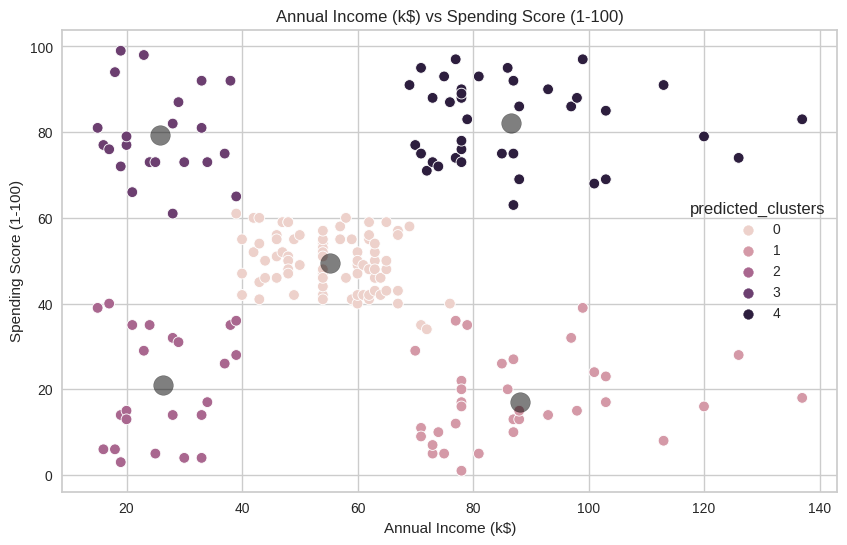

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(x ='Annual Income (k$)',y = 'Spending Score (1-100)',hue=X1["predicted_clusters"],
                 #palette=['red','blue','green','purple','orange','gray'], legend='full',
                data = X1  ,s = 60 )

# Plot the cluster centers (in black, as you've done)
plt.scatter(centers_X1[:, 0],
            centers_X1[:, 1],
            c='black',
            s=200,
            alpha=0.5)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.show()


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- X2

In [67]:
X2 = df[["Age", 'Spending Score (1-100)']].copy()
X2.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [85]:
hopkins(X2, 0.1)
#the value of hopkins more than 0.5 we can continue with Clustering

0.7102844448950799

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [75]:
hc_ward = linkage(y=X2, method="ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

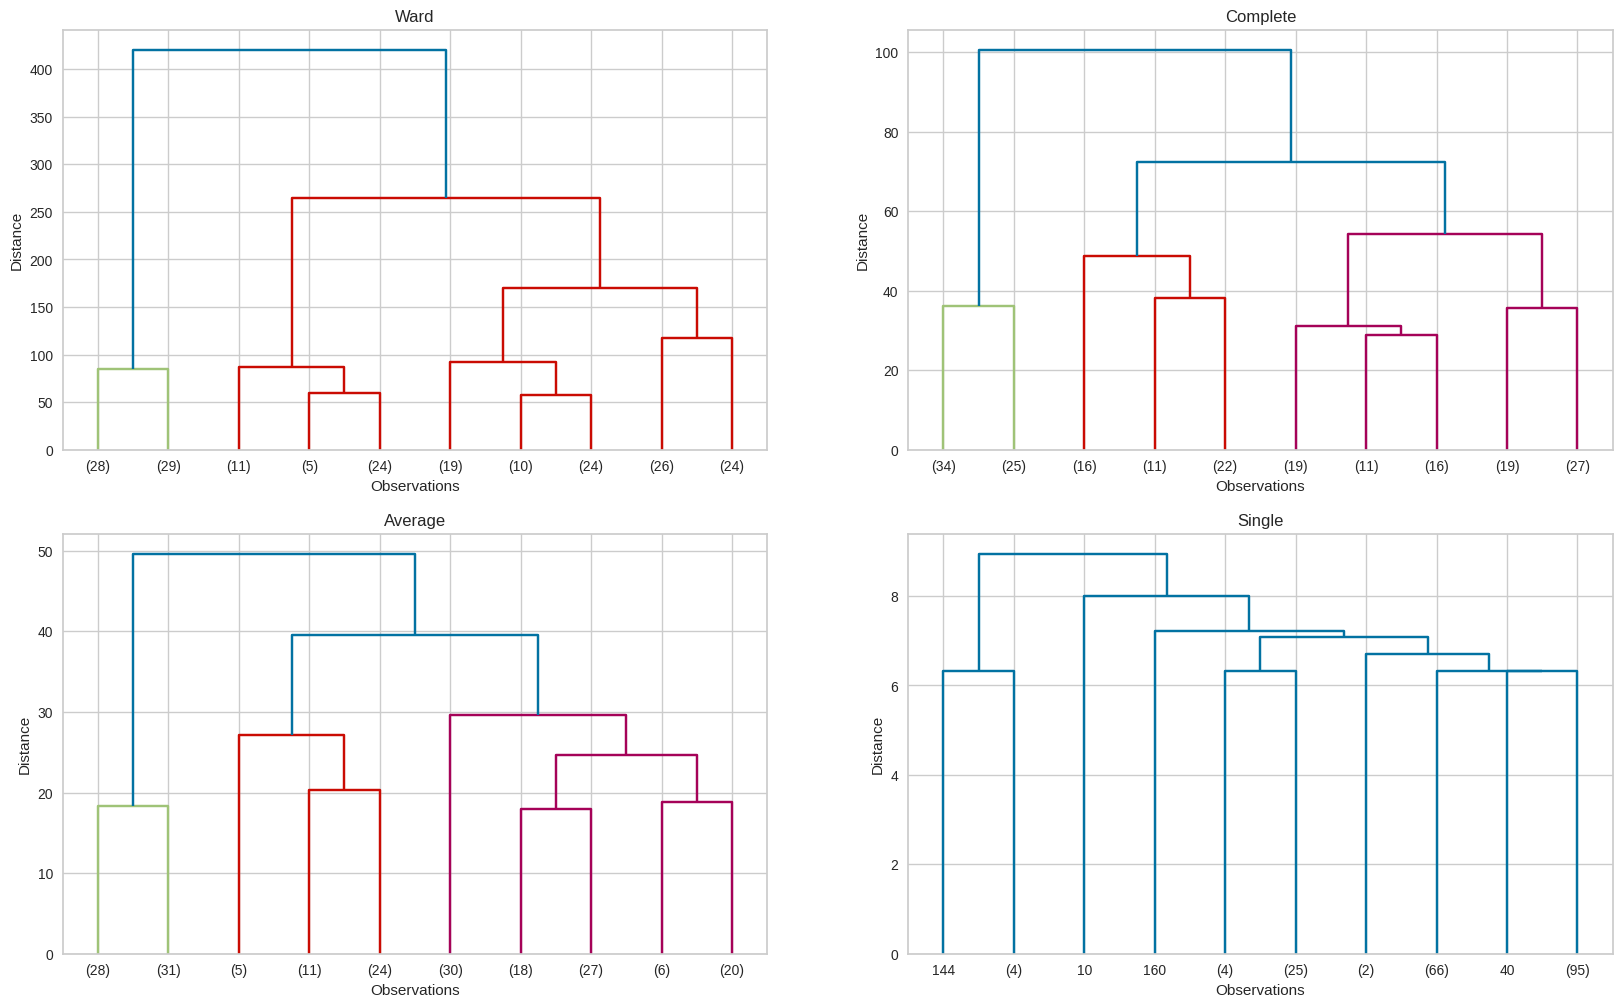

In [76]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [87]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )
#use 4 clusters

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091
For n_clusters=10, the silhouette score is 0.3876666104778445


## Clustering based on Annual Income and Spending Score- X3

In [77]:
X3 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X3

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [78]:
hopkins(X3, 0.1)

0.6661659730416322

In [79]:
hc_ward2 = linkage(y=X3, method="ward")
hc_complete2 = linkage(X3, "complete")
hc_average2 = linkage(X3, "average")
hc_single2 = linkage(X3, "single")

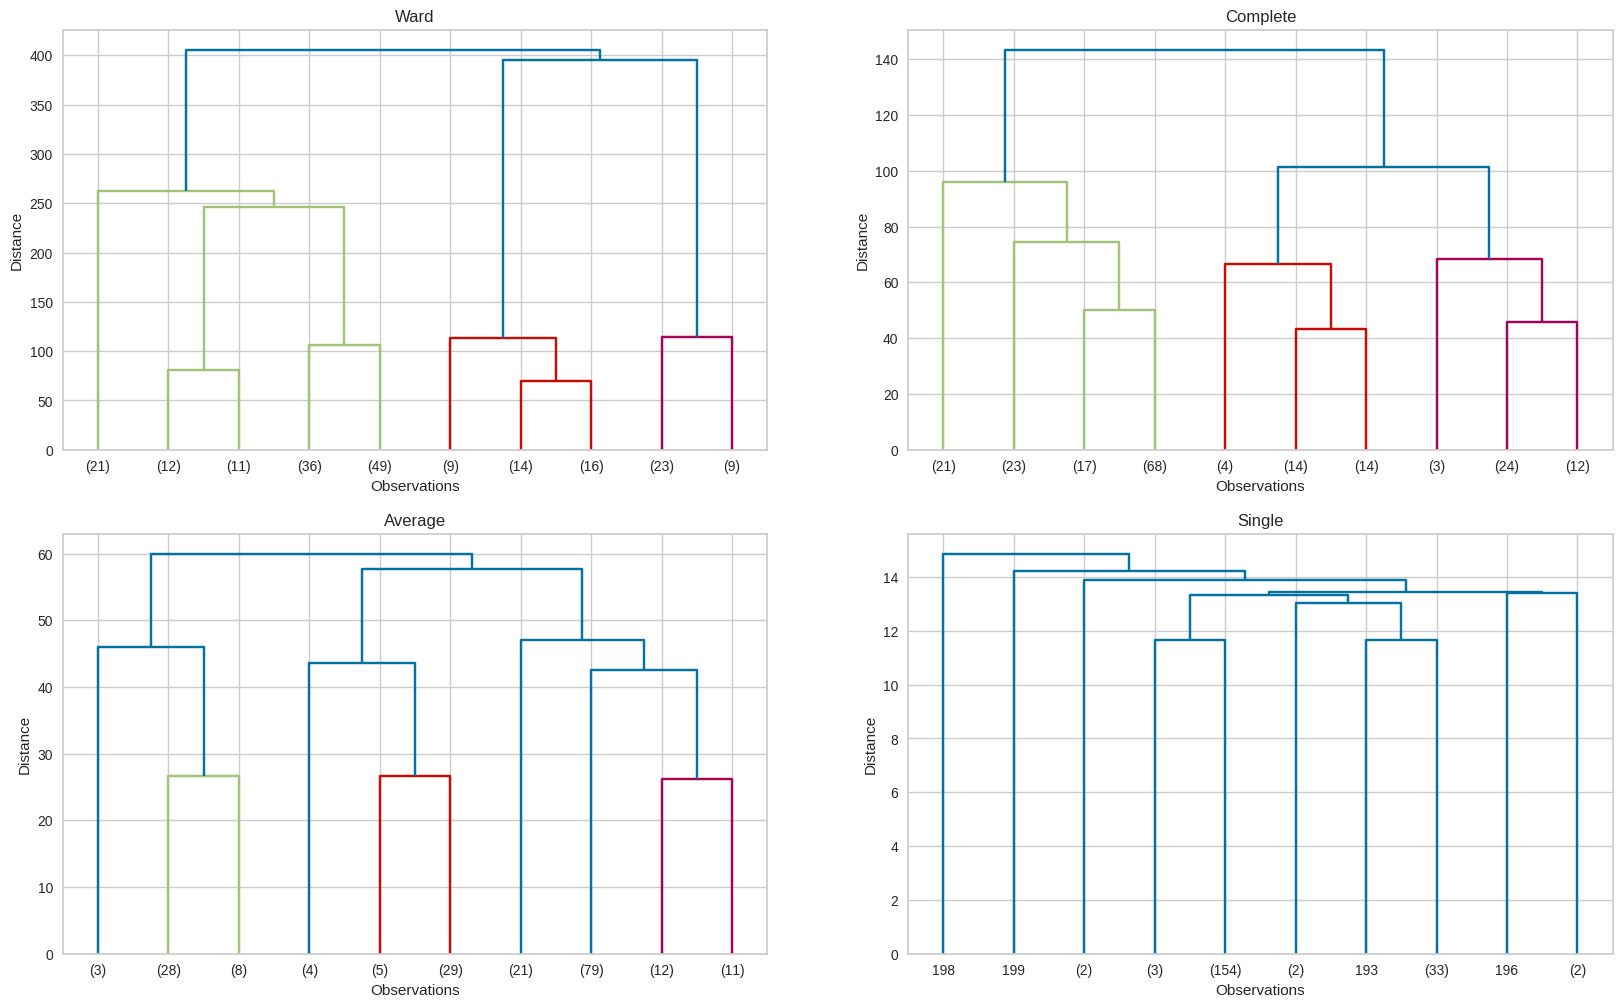

In [80]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward2, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete2, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average2, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single2, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [90]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X3)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X3, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )
#use 5 clusters

For n_clusters=2, the silhouette score is 0.36705328909139184
For n_clusters=3, the silhouette score is 0.46177478231397956
For n_clusters=4, the silhouette score is 0.49184698086946554
For n_clusters=5, the silhouette score is 0.5529797620529543
For n_clusters=6, the silhouette score is 0.5380052718910655
For n_clusters=7, the silhouette score is 0.5198233354020015
For n_clusters=8, the silhouette score is 0.43206681628554394
For n_clusters=9, the silhouette score is 0.4385175618799447
For n_clusters=10, the silhouette score is 0.43376732518875444


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- X2

In [81]:
from sklearn.cluster import AgglomerativeClustering

In [82]:
model =  AgglomerativeClustering(n_clusters=4,
                                 affinity="euclidean",
                                 linkage="ward")
clusters_X2 = model.fit_predict(X2)

In [102]:
clusters_X2  = model.fit_predict(X2)
X2["predicted_cluster"] = clusters_X2
X2

,Age,Spending Score (1-100),clusters,predicted_cluster
0,19,39,4,0
1,21,81,3,3
2,20,6,4,2
3,23,77,3,3
4,31,40,4,0
...,...,...,...,...
195,35,79,2,3
196,45,28,0,0
197,32,74,2,3
198,32,18,0,2


#### Annual Income and Spending Score- X3

In [113]:
model_2 = AgglomerativeClustering(n_clusters=5,
                                 affinity="euclidean",
                                 linkage="ward")
clusters_X3 = model_2.fit_predict(X3)

In [114]:
clusters_X3 = model_2.labels_
X3["predicted_cluster"] = clusters_X3
X3

,Annual Income (k$),Spending Score (1-100),clusters,predicted_cluster
0,15,39,4,4
1,15,81,3,3
2,16,6,4,4
3,16,77,3,3
4,17,40,4,4
...,...,...,...,...
195,120,79,2,2
196,126,28,0,0
197,126,74,2,2
198,137,18,0,0


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- X2

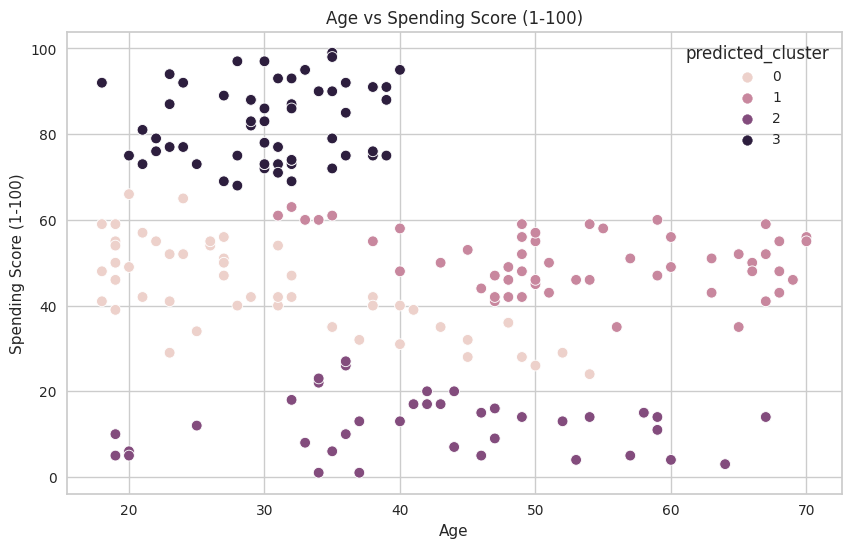

In [116]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age',y = 'Spending Score (1-100)',hue=X2["predicted_cluster"],
                 #palette=['red','blue','green','purple','orange','gray'], legend='full',
                data = X2  ,s = 60 )



plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score (1-100)')
plt.show()

#### Annual Income and Spending Score- x2

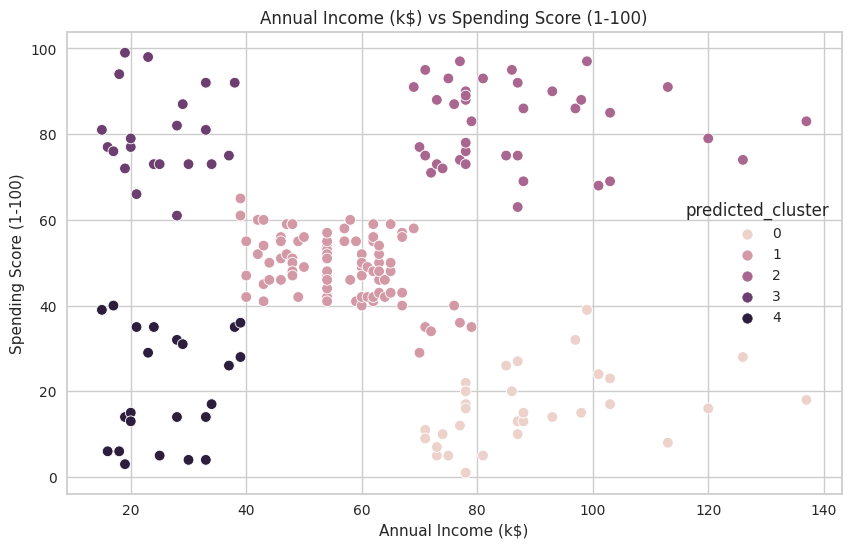

In [115]:
plt.figure(figsize=(10,6))
sns.scatterplot(x ='Annual Income (k$)',y = 'Spending Score (1-100)',hue=X3["predicted_cluster"],
                 #palette=['red','blue','green','purple','orange','gray'], legend='full',
                data = X3  ,s = 60 )


plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) vs Spending Score (1-100)')
plt.show()


#### Interpretation based on Age and Spending Score- x1

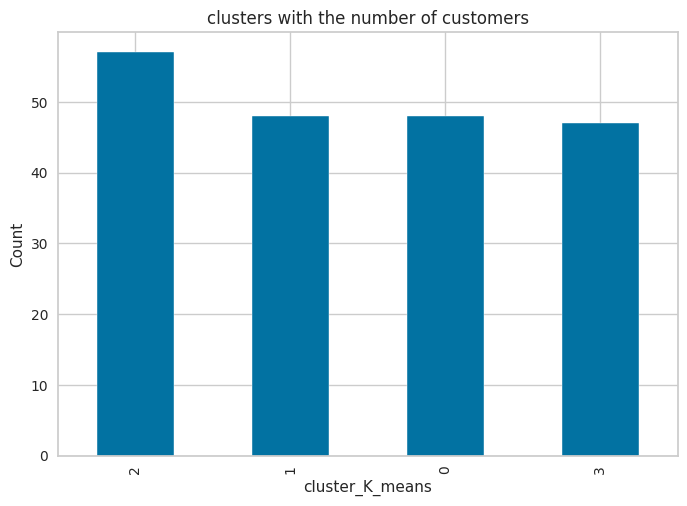

In [147]:
#the number of poeple in each clusters
#cluster_K_means=X["predicted_clusters"].value_counts()
plt.title("clusters with the number of customers")
plt.xlabel("cluster_K_means")
plt.ylabel("Count")
ax = X["predicted_clusters"].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

In [199]:
df_2=df.copy()

In [201]:
df_2.drop(["Gender"], axis = 1, inplace=True)

In [202]:
df_2["cluster_Age_Spending_Score(K-means)"] = X["predicted_clusters"]
df_2.head()
#add clusters resulting from K-means to our df_2


,Age,Annual Income (k$),Spending Score (1-100),cluster_Age_Spending_Score(K-means)
0,19,15,39,3
1,21,15,81,2
2,20,16,6,1
3,23,16,77,2
4,31,17,40,3


In [203]:
df_2=df_2.groupby("cluster_Age_Spending_Score(K-means)").mean()
df_2

,Age,Annual Income (k$),Spending Score (1-100)
cluster_Age_Spending_Score(K-means),,,
0,55.708333,54.770833,48.229167
1,43.291667,66.937500,15.020833
2,30.175439,66.070175,82.350877
3,27.617021,53.276596,49.148936


### Conclusion

**cluster 0** : The average age is around 56, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 43, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 26.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

[Text(0, 0, '81'),
 Text(0, 0, '39'),
 Text(0, 0, '35'),
 Text(0, 0, '23'),
 Text(0, 0, '22')]

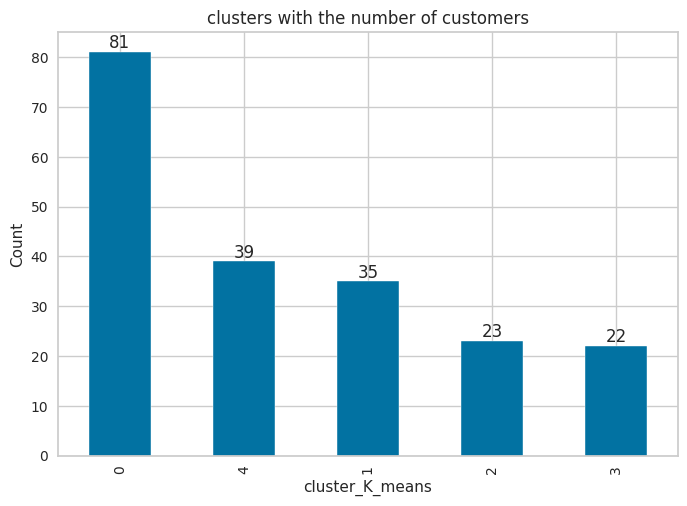

In [189]:
#the number of poeple in each clusters
plt.title("clusters with the number of customers")
plt.xlabel("cluster_K_means")
plt.ylabel("Count")
ax = X1["predicted_clusters"].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

In [207]:
df_3=df.copy()

In [208]:
df_3["cluster_Annual_Income_Spending_Score(K-means)"] = X1["predicted_clusters"]
df_3.head()
#add clusters resulting from K-means to our df_3

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_Annual_Income_Spending_Score(K-means)
0,0,19,15,39,2
1,0,21,15,81,3
2,1,20,16,6,2
3,1,23,16,77,3
4,1,31,17,40,2


In [211]:
df_3=df_3.groupby(["Gender","cluster_Annual_Income_Spending_Score(K-means)"]).mean()
df_3

Age  \
Gender cluster_Annual_Income_Spending_Score(K-means)              
0      0                                              45.363636   
       1                                              39.315789   
       2                                              48.333333   
       3                                              25.000000   
       4                                              33.277778   
1      0                                              40.895833   
       1                                              43.250000   
       2                                              43.214286   
       3                                              25.461538   
       4                                              32.190476   

                                                      Annual Income (k$)  \
Gender cluster_Annual_Income_Spending_Score(K-means)                       
0      0                                                       55.212121   
       1                                                       85.894737   
       2                                                       24.666667   
       3                                                       25.777778   
       4                                                       87.111111   
1      0                                                       55.354167   
       1                                                       90.937500   
       2                                                       27.357143   
       3                                                       25.692308   
       4                                                       86.047619   

                                                      Spending Score (1-100)  
Gender cluster_Annual_Income_Spending_Score(K-means)                          
0      0                                                           50.272727  
       1                                                           12.947368  
       2                                                           19.666667  
       3                                                           77.666667  
       4                                                           82.666667  
1      0                                                           49.000000  
       1                                                           22.062500  
       2                                                           21.714286  
       3                                                           80.538462  
       4                                                           81.666667

## Conclusion
### {'Male': 0, 'Female': 1}

### Female (1)

**cluster 0** : The average age is around 41, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 43, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 43. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 32, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male(0)

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 39, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 48. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

In [212]:
df_3=df_3.groupby(["cluster_Annual_Income_Spending_Score(K-means)"]).mean()
df_3

,Age,Annual Income (k$),Spending Score (1-100)
cluster_Annual_Income_Spending_Score(K-means),,,
0,43.129735,55.283144,49.636364
1,41.282895,88.416118,17.504934
2,45.773810,26.011905,20.690476
3,25.230769,25.735043,79.102564
4,32.734127,86.579365,82.166667


**cluster 0** : The average age is around 43, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 41, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 46. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___